In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv


## Read the data

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Check for missing values

In [3]:
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Get information on df

In [4]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Check number of cases of HeartDiseaseorAttack

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

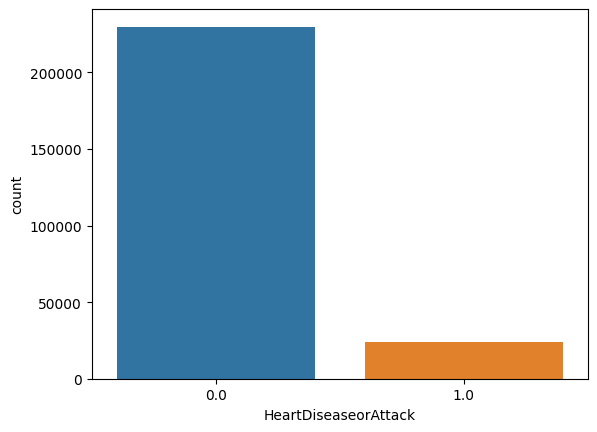

In [6]:
sns.countplot(df, x='HeartDiseaseorAttack')

#### The result are imbalanced

## Use heatmap to explore correlation

<Axes: >

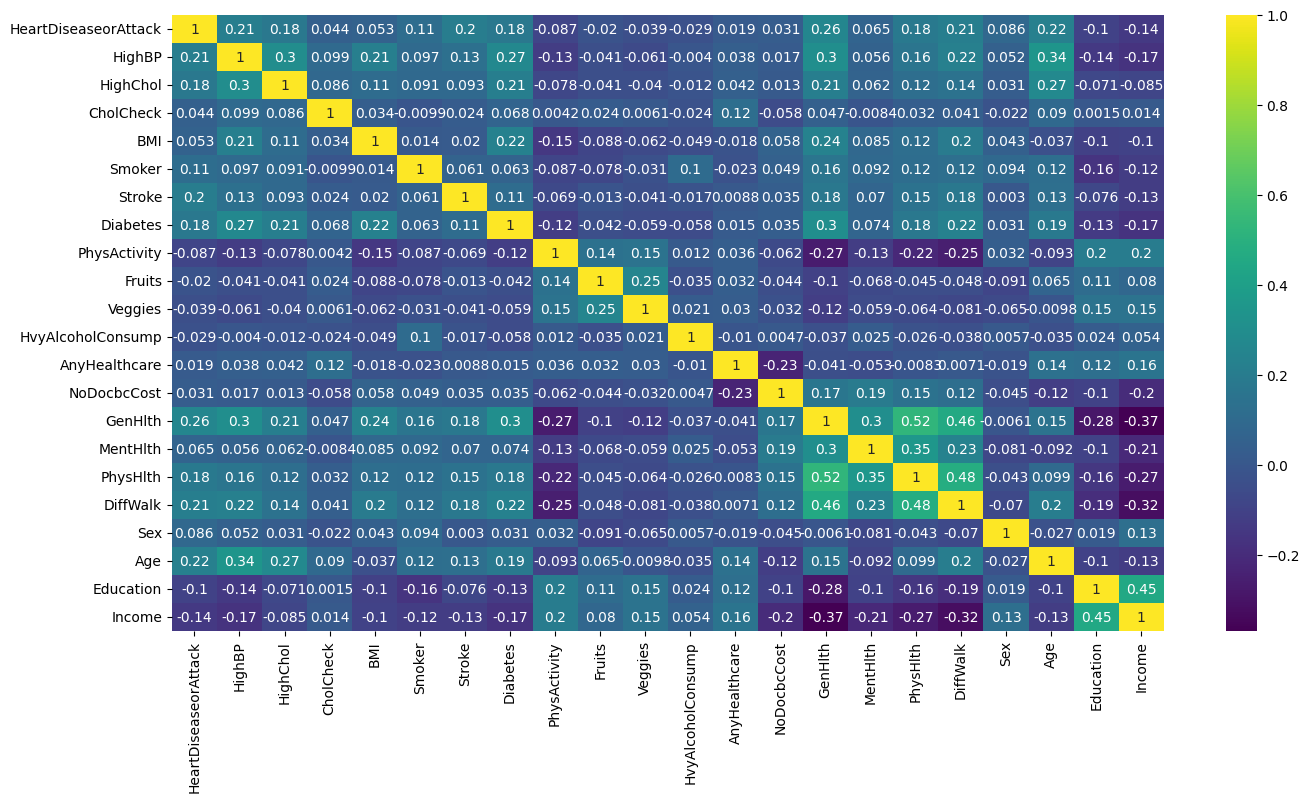

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

# Model Development

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# separate df into features and target label
y=df['HeartDiseaseorAttack']
X=df.drop('HeartDiseaseorAttack', axis=1)

In [10]:
#train_test_split with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [12]:
# define each model basically

log_model=LogisticRegression(max_iter=1000000, class_weight='balanced')
dt_model=DecisionTreeClassifier(class_weight='balanced')
rf_model=RandomForestClassifier(class_weight='balanced')
ada_model=AdaBoostClassifier()
gb_model=GradientBoostingClassifier()
xg_model=xgb.XGBClassifier()

In [13]:
# run a for loop to run each model

models=[log_model, dt_model, rf_model, ada_model, gb_model, xg_model]
accuracy_scores=[]
recall_scores=[]
precision_scores=[]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

In [14]:
# get a report of each model's performance

models_report=pd.DataFrame({'model':models, 'accuracy':accuracy_scores, 
                            'precision': precision_scores, 'recall' : recall_scores})
models_report.head()

,model,accuracy,precision,recall
0,"LogisticRegression(class_weight='balanced', ma...",0.754356,0.248972,0.800336
1,DecisionTreeClassifier(class_weight='balanced'),0.855172,0.236842,0.243498
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.901254,0.402576,0.104866
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.907679,0.531065,0.150587
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.908487,0.564633,0.114513


In [15]:
# cleaning the model for clarity
models_report['model']=models_report['model'].apply(lambda x: str(x).split('(')[0])

In [16]:
models_report

,model,accuracy,precision,recall
0,LogisticRegression,0.754356,0.248972,0.800336
1,DecisionTreeClassifier,0.855172,0.236842,0.243498
2,RandomForestClassifier,0.901254,0.402576,0.104866
3,AdaBoostClassifier,0.907679,0.531065,0.150587
4,GradientBoostingClassifier,0.908487,0.564633,0.114513
5,XGBClassifier,0.907186,0.528724,0.113884


## Model Selection for Heart Disease Prediction

When choosing a machine learning model for predicting whether a patient has heart disease or not, the decision depends on the specific goals and constraints of the application. Here are some considerations:

- **High Recall Model:**
  - *Goal:* To capture as many patients with heart disease as possible.
  - *Consequence:* Accepting a higher rate of false alarms (false positives).
  - *Suitable Models:* Models with high recall values (e.g., "LogisticRegression").

- **High Precision Model:**
  - *Goal:* To minimize false positives to avoid incorrect diagnoses.
  - *Consequence:* Potentially missing some cases of heart disease (false negatives).
  - *Suitable Models:* Models with high precision values (e.g., "GradientBoostingClassifier" or "XGBClassifier").


In the field of healthcare, where the consequences of misdiagnosis can be significant, the choice of the machine learning model should align with the specific requirements and constraints of the application. Consultation with domain experts and an understanding of the potential costs and benefits of different model choices are essential in making this critical decision.


In [17]:
# check prediction of log_model and gb_model
log_y_pred=log_model.predict(X_test)
gb_y_pred=gb_model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, recall_score

In [19]:
# function to return visual report to understand precision and recall
def make_report(true, pred):
    print(classification_report(true, pred))
    ConfusionMatrixDisplay.from_predictions( true, pred)

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     45968
         1.0       0.25      0.80      0.38      4768

    accuracy                           0.75     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.91      0.75      0.80     50736



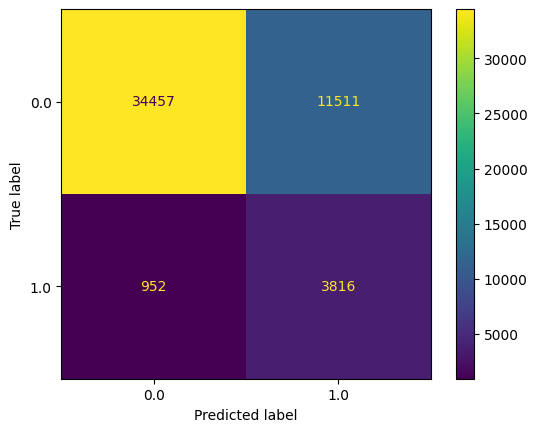

In [20]:
# classification report and confusion matrix
make_report(y_test, log_y_pred)


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.56      0.11      0.19      4768

    accuracy                           0.91     50736
   macro avg       0.74      0.55      0.57     50736
weighted avg       0.88      0.91      0.88     50736



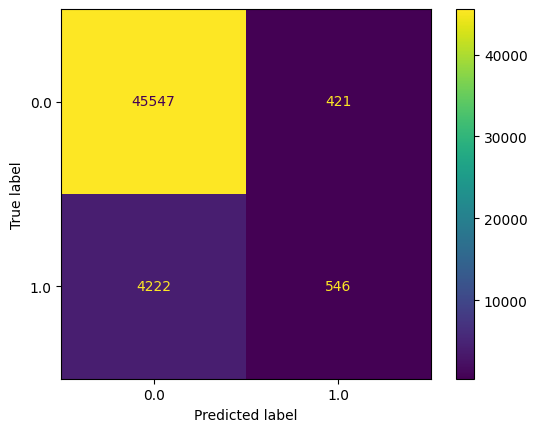

In [21]:
#classification report and confusion matrix
make_report(y_test, gb_y_pred)

## Bringing advantages of both models to get the most of precision and recall

In [22]:
merged=np.argmax(((log_model.predict_proba(X_test)) + (gb_model.predict_proba(X_test))  )/2, axis=1)

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     45968
         1.0       0.37      0.47      0.42      4768

    accuracy                           0.88     50736
   macro avg       0.66      0.69      0.67     50736
weighted avg       0.89      0.88      0.88     50736



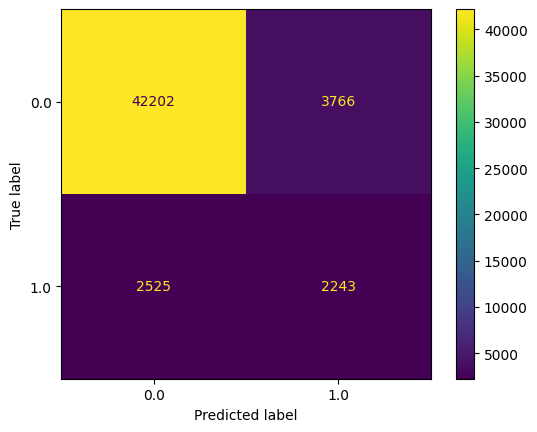

In [23]:
make_report(y_test, merged)

## Finally a model with an accuracy of 88% a recall of 0.47 and precision of 0.37

## Calculate Feature Importances of each column checking how they impact the model

In [24]:
feature_importances =pd.DataFrame({'parameter': log_model.feature_names_in_,
                                   'log_importance': log_model.coef_[0],
                                   'gb_importance': gb_model.feature_importances_})

In [25]:
feature_importances['average_importance']=(feature_importances['log_importance']+feature_importances['gb_importance'])/2

In [26]:
feature_importances=feature_importances.sort_values('average_importance')

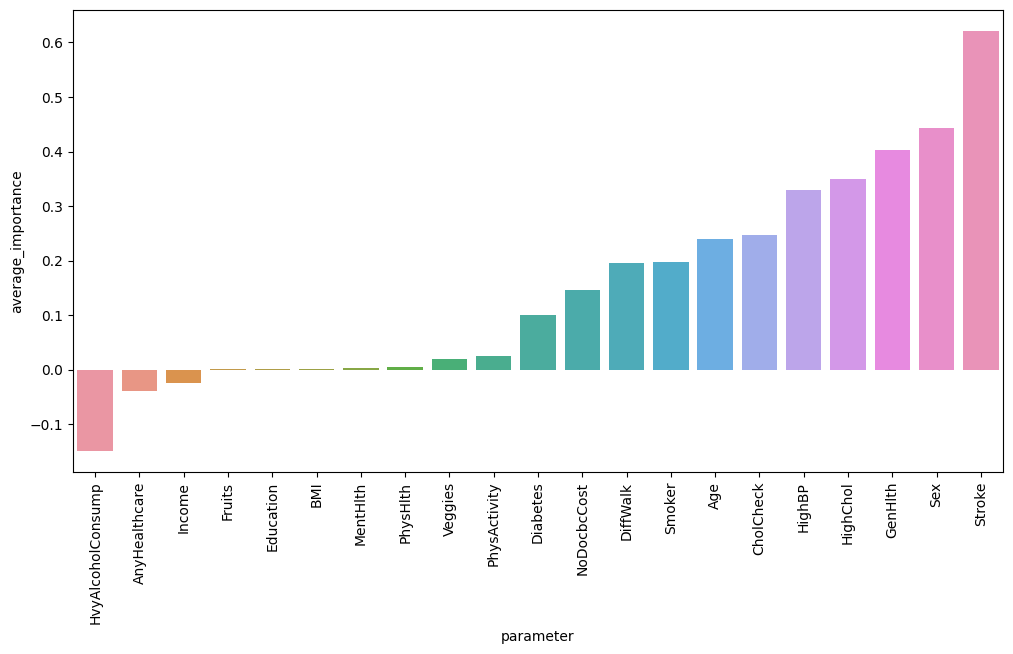

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(data=feature_importances,x='parameter', y='average_importance')
plt.xticks(rotation=90);